# MEDICAL INSURANCE COST PREDICION 

About the Dataset-

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
  objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

# Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# Import Data

In [2]:
data = pd.read_csv(r"..\datasets\insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#checking for null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

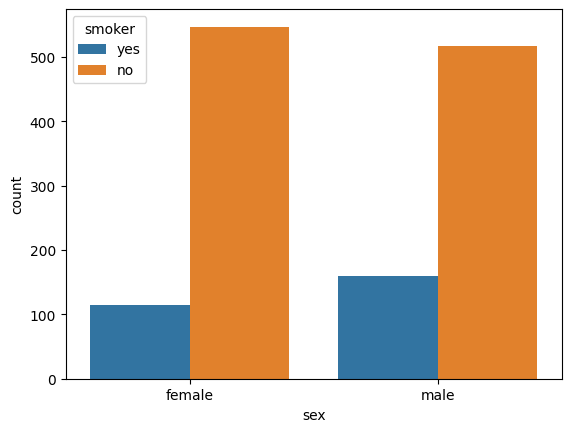

In [6]:
sns.countplot(data, x='sex', hue='smoker')

# Show the plot
plt.show()

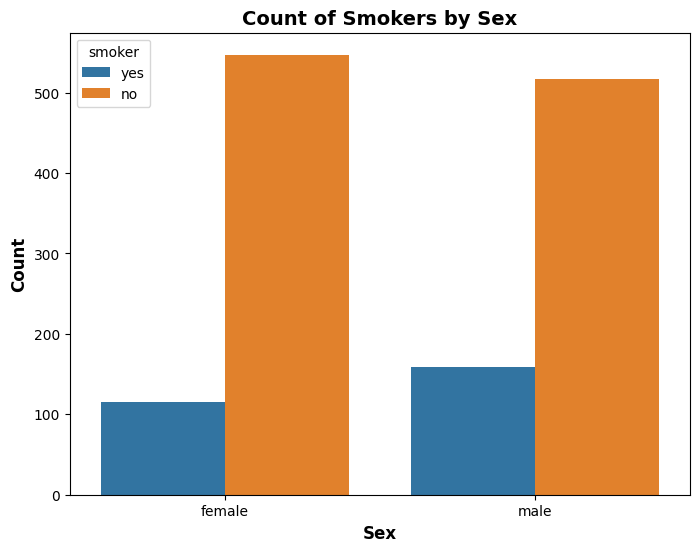

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(8, 6))

# Create count plot
sns.countplot(
    data, 
    x="sex", 
    hue="smoker"
)

# Set labels and title
plt.xlabel("Sex", fontsize=12, weight='bold')
plt.ylabel("Count", fontsize=12, weight='bold')
plt.title("Count of Smokers by Sex", fontsize=14, weight='bold')

# Show plot
plt.show()


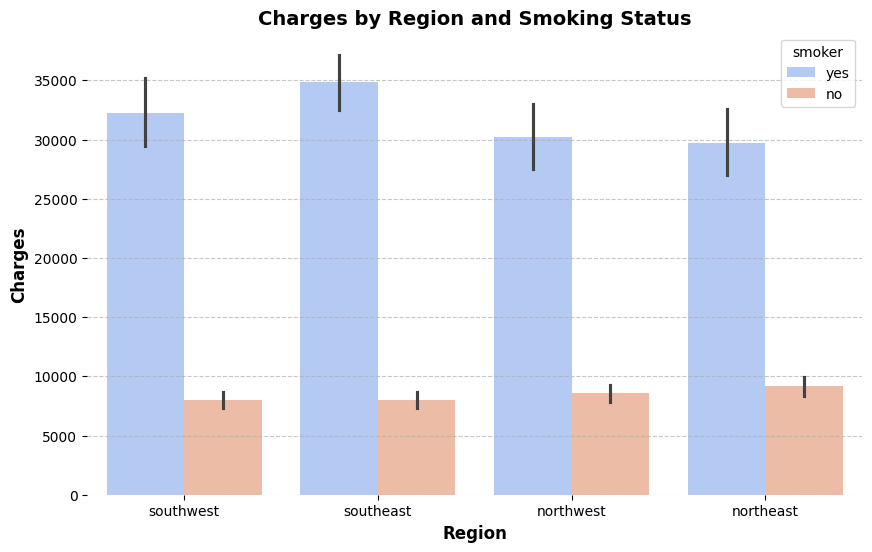

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))

# Create boxplot to compare charges by region and smoking status
sns.barplot(
    data=data, 
    x="region", 
    y="charges", 
    hue="smoker", 
    palette="coolwarm"
)

# Set labels and title
plt.xlabel("Region", fontsize=12, weight='bold')
plt.ylabel("Charges", fontsize=12, weight='bold')
plt.title("Charges by Region and Smoking Status", fontsize=14, weight='bold')

# Improve layout
sns.despine(left=True, bottom=True)
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Show plot
plt.show()


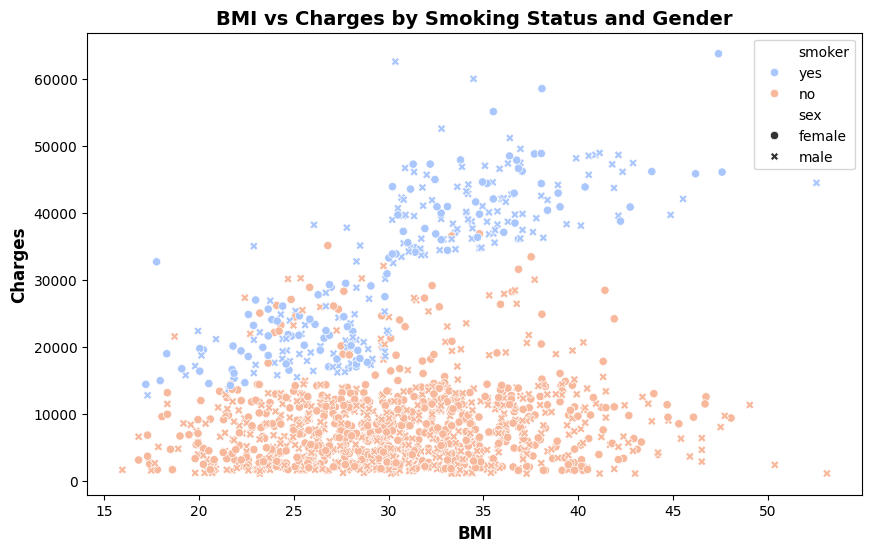

In [9]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create scatter plot to analyze BMI vs Charges
sns.scatterplot(
    data=data, 
    x="bmi", 
    y="charges", 
    hue="smoker", 
    palette="coolwarm", 
    style="sex"
)

# Set labels and title
plt.xlabel("BMI", fontsize=12, weight='bold')
plt.ylabel("Charges", fontsize=12, weight='bold')
plt.title("BMI vs Charges by Smoking Status and Gender", fontsize=14, weight='bold')

# Show plot
plt.show()


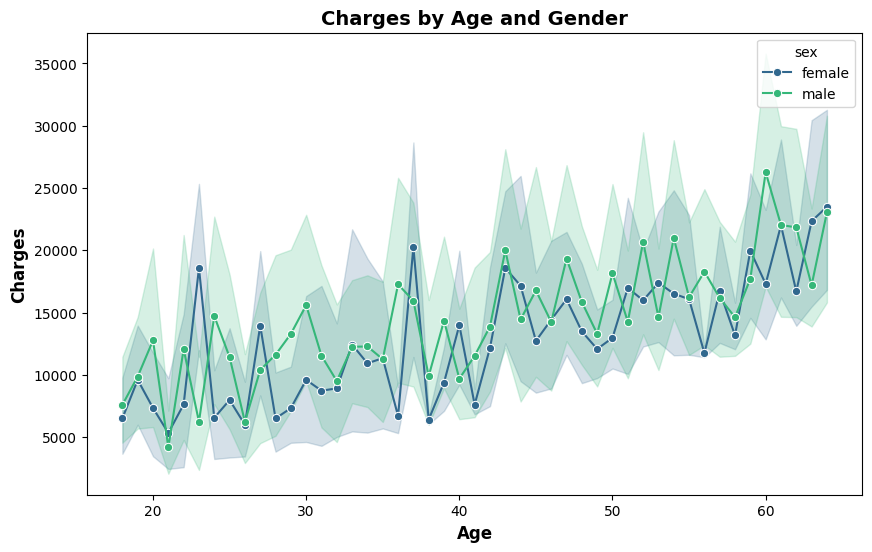

In [10]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create lineplot with updated color palette
sns.lineplot(
    data=data, 
    x="age", 
    y="charges", 
    hue="sex", 
    marker="o", 
    palette="viridis"
)

# Set labels and title
plt.xlabel("Age", fontsize=12, weight='bold')
plt.ylabel("Charges", fontsize=12, weight='bold')
plt.title("Charges by Age and Gender", fontsize=14, weight='bold')

# Show plot
plt.show()


In [11]:
data.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [12]:
data.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [13]:
encoder = LabelEncoder()

In [14]:
data['sex'] = encoder.fit_transform(data.sex)

In [15]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [16]:
data.sex.value_counts()

sex
1    676
0    662
Name: count, dtype: int64

SEX

- MALE -> 1
- FEMALE -> 0

In [17]:
data['region'] = encoder.fit_transform(data.region)

In [18]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,3,16884.92400
1,18,1,33.770,1,no,2,1725.55230
2,28,1,33.000,3,no,2,4449.46200
3,33,1,22.705,0,no,1,21984.47061
4,32,1,28.880,0,no,1,3866.85520


REGION

- Northeast -> 0
- Northwest -> 1
- Southeast -> 2
- Southwest -> 3

In [19]:
data['smoker'] = encoder.fit_transform(data.smoker)

In [20]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


SMOKER 

- Yes -> 1
- No -> 0

# Split Data

In [21]:
X = data.drop(columns='charges',axis=1)
y = data['charges']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [24]:
model = RandomForestRegressor()

In [25]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [26]:
y_pred = model.predict(X_test)

In [27]:
score = metrics.r2_score(y_test, y_pred)
score

0.8619171819488207

# Saving the trained model

In [48]:
import pickle

filename = 'medical_insurance_cost_predictor.pkl'
pickle.dump(model, open(filename,'wb')) 